In [1]:
#import all the encessary documents
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from collections import Counter
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

from sklearn.feature_extraction.image import grid_to_graph
from sklearn import tree
from sklearn import metrics

#For displaying the tree
from sklearn.externals.six import StringIO
from IPython.display import Image, display
import pydotplus


pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 25)
os.chdir(r'C:\Users\tejan\Downloads\creditcardfraud')

C:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
#reading the data
SMOTE_TRAIN = pd.read_csv("SMOTE_TRAIN.csv")

print("The first 5 rows in the dataset are :", "\n", SMOTE_TRAIN.head())
print("\n")
print("The shape of the data is :", str(SMOTE_TRAIN.shape))


The first 5 rows in the dataset are : 
       V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  ...    V21    V22    V23    V24    V25    V26    V27    V28  Amount  Class
0  0.011  0.672 -0.939 -0.346  0.737 -0.194  0.536  0.250 -0.456 -0.962  ...  0.451  1.243 -0.406 -2.384 -0.307 -0.188 -0.038  0.056  -0.201      0
1 -0.172  0.668  0.842  0.047 -0.018 -0.745  0.545 -0.034 -0.273 -0.454  ... -0.371 -1.020 -0.018  0.516 -0.347  0.155  0.595  0.299  -0.346      0
2 -0.127  0.499  0.125 -0.508  0.153 -0.617  0.617  0.069  0.177  0.106  ... -0.344 -0.844  0.179 -0.081 -1.081  0.275  0.842  0.438  -0.320      0
3 -0.020  0.353 -0.098 -0.417  0.744 -0.047  0.636 -0.005 -0.013 -0.327  ... -0.251 -0.699 -0.011 -2.006 -0.702 -1.115 -0.090  0.136  -0.316      0
4 -2.471  2.030 -2.061 -0.159 -1.545 -0.936 -1.129  1.885  0.135  0.184  ...  0.246 -0.416  0.829 -0.030 -1.701  0.060 -6.562 -1.719  -0.235      0

[5 rows x 30 columns]


The shape of the data is : (426472, 30)


In [6]:
#crearting the features, labels, column names in the features data
X = SMOTE_TRAIN.iloc[:,:-1]
y = SMOTE_TRAIN.iloc[:,-1]
col_names = list(X.columns)
classnames = list(SMOTE_TRAIN.Class.unique())

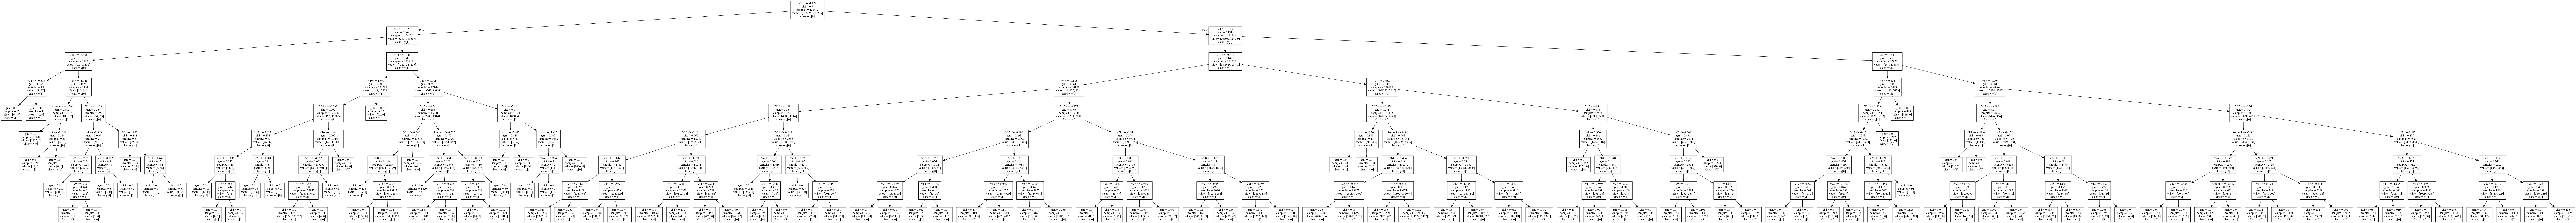

In [7]:
#building a tree with a maximum depth of 8 and using all features
dot_data = StringIO()
DT_tree = tree.DecisionTreeClassifier(max_depth = 8).fit(X,y)

dot_data = StringIO()
tree.export_graphviz(DT_tree, out_file=dot_data,
                     feature_names=col_names[0:30],
                     class_names=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
display(Image(graph.create_png()))

In [23]:
#saving the feature importance to local file
feature_importances = pd.read_csv("C:\\Users\\tejan\\Downloads\\creditcardfraud\\feature_importances.csv")

In [41]:
feature_importances.head()

,Variable,Variable Importance
13,V14,0.814
3,V4,0.046
14,V15,0.016
7,V8,0.011
25,V26,0.011


In [39]:
#sorting the feature importances by descending order of variable importance
feature_importances.sort_values(by = "Variable Importance", ascending = False, inplace = True)

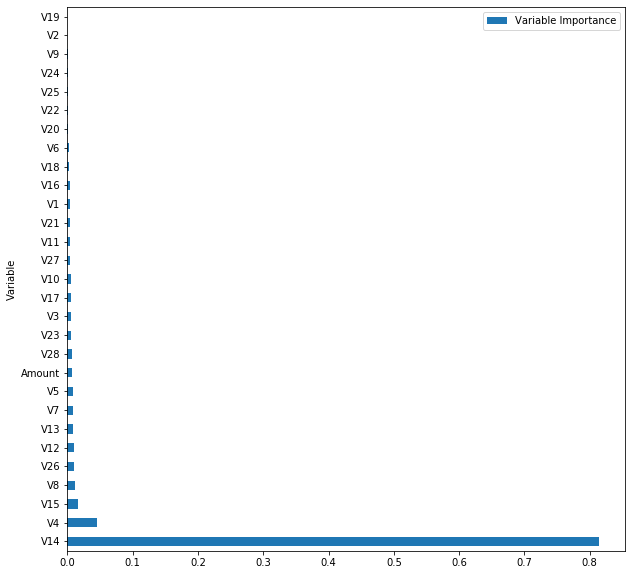

In [40]:
ax = feature_importances.plot.barh(x='Variable', y='Variable Importance', figsize = (10,10))

In [42]:
#classification report of the tree
predicted = DT_tree.predict(X)
print(metrics.classification_report(y, predicted))
cm = metrics.confusion_matrix(y, predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98    213236
           1       0.98      0.97      0.98    213236

    accuracy                           0.98    426472
   macro avg       0.98      0.98      0.98    426472
weighted avg       0.98      0.98      0.98    426472

[[208671   4565]
 [  6056 207180]]


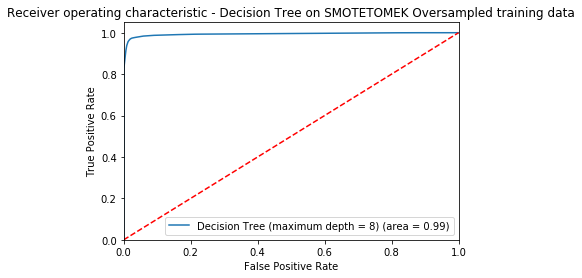

<Figure size 432x288 with 0 Axes>

In [46]:
#roc curve of the tree on training data
logit_roc_auc = roc_auc_score(y, DT_tree.predict_proba(X)[:,1])
fpr, tpr, thresholds = roc_curve(y, DT_tree.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (maximum depth = 8) (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Decision Tree on SMOTETOMEK Oversampled training data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()
plt.show()

In [4]:
#reading the test data
testdata = pd.read_csv("test.csv")
testdata.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.596,0.044,-0.481,1.114,1.565,3.095,-0.509,0.824,-0.299,0.524,...,-0.166,-0.490,-0.199,1.673,1.492,0.187,0.017,0.046,-0.255,0
1,-0.689,-0.069,-0.212,-1.394,0.840,-0.329,0.084,0.377,0.495,-1.384,...,0.244,0.715,-0.907,-1.763,-0.272,-1.588,0.291,-0.440,-0.290,0
2,1.006,-0.224,-0.179,0.346,-0.536,-0.397,-0.475,-0.058,1.292,-0.161,...,0.256,1.129,0.152,-0.123,-0.125,-0.429,0.111,-0.110,-0.306,0
3,0.555,0.049,0.207,0.722,-0.002,0.183,-0.019,0.113,-0.016,0.009,...,-0.128,-0.281,-0.104,-0.520,1.019,-0.902,0.083,0.033,-0.201,0
4,0.079,0.089,0.211,-0.325,0.706,-0.438,0.677,-0.321,0.333,0.352,...,-0.370,-0.701,0.007,-0.862,-2.100,0.193,-0.931,-1.113,-0.337,0


In [44]:
#creating the features and labels
X_test = testdata.iloc[:,:-1]
y_test = testdata.iloc[:,-1]

#predict using the test data
predicted = DT_tree.predict(X_test)
print(metrics.classification_report(y_test, predicted))

cm = metrics.confusion_matrix(y_test, predicted)
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     71079
           1       0.06      0.89      0.12       123

    accuracy                           0.98     71202
   macro avg       0.53      0.94      0.55     71202
weighted avg       1.00      0.98      0.99     71202

[[69470  1609]
 [   13   110]]


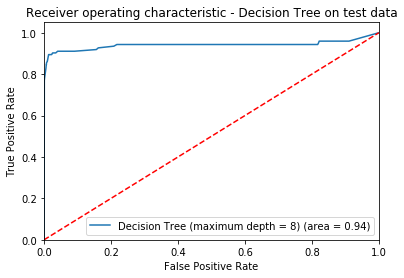

<Figure size 432x288 with 0 Axes>

In [49]:
#roc curve on the test data
logit_roc_auc = roc_auc_score(y_test, DT_tree.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, DT_tree.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (maximum depth = 8) (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - Decision Tree on test data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()
plt.show()

In [12]:
#reading the raw data to do cross-validation
data = pd.read_csv("C:\\Users\\tejan\\Downloads\\creditcardfraud\\creditcard.csv")
data.head()
scaler = preprocessing.StandardScaler()
data.drop(['Time'], axis = 1, inplace = True)

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_standardized = scaler.fit_transform(X)

# Now, do cv on tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline, make_pipeline
kf = KFold(n_splits=10, random_state=1, shuffle=False)
imba_pipeline = make_pipeline(SMOTETomek(random_state=1), 
                              DecisionTreeClassifier(max_depth = 8, random_state=10))
cross_val_score(imba_pipeline, X_standardized, y, scoring='recall', cv=kf)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [5]:
#converting features and labels to arrays
X = SMOTE_TRAIN.iloc[:,:-1].values
y = SMOTE_TRAIN.iloc[:,-1].values.reshape(-1)
X_test = testdata.iloc[:,:-1].values
y_test = testdata.iloc[:,-1].values.reshape(-1)

# Random Forest model

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 200, bootstrap = True, n_jobs = -1, random_state=0)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [18]:
#predictions on the test data and printing all the training and validation metrics
predictions = rf_clf.predict(X)
probs = rf_clf.predict_proba(X)[:, 1]
from sklearn.metrics import roc_auc_score
# Calculate roc auc
roc_value = roc_auc_score(y, probs)
recallscore = recall_score(y, predictions)
precisionscore = precision_score(y, predictions)
accuracy = rf_clf.score(X, y )
f1score = f1_score(y, predictions)
print(roc_value)
print(recallscore)
print(precisionscore)
print(accuracy)
print(f1score)


predictions_test = rf_clf.predict(X_test)
probs_test = rf_clf.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score
# Calculate roc auc
roc_value = roc_auc_score(y_test, probs_test)
recallscore = recall_score(y_test, predictions_test)
precisionscore = precision_score(y_test, predictions_test)
accuracy = rf_clf.score(X_test, y_test )
f1score = f1_score(y_test, predictions_test)
print(roc_value)
print(recallscore)
print(precisionscore)
print(accuracy)
print(f1score)


1.0
1.0
1.0
1.0
1.0
0.9991073713126022
0.7723577235772358
0.95
0.9995365298727564
0.852017937219731


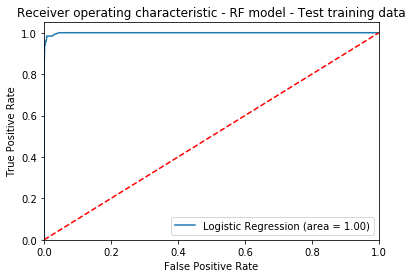

<Figure size 432x288 with 0 Axes>

In [19]:
#roc curve
logit_roc_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - RF model - Test training data')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.figure()
plt.show()

In [20]:
#saving the feature importances data
cols = list(data.columns.values)
cols.remove('Class')
feature_importance = pd.DataFrame({'Variables': cols,
                   'Variable_Importance': rf_clf.feature_importances_}).sort_values('Variable_Importance', ascending = False)


feature_importance.to_csv("rf_featureImportance.csv")




In [21]:
feature_importance.head()

,Variables,Variable_Importance
16,V17,0.187
11,V12,0.133
13,V14,0.120
9,V10,0.072
10,V11,0.071


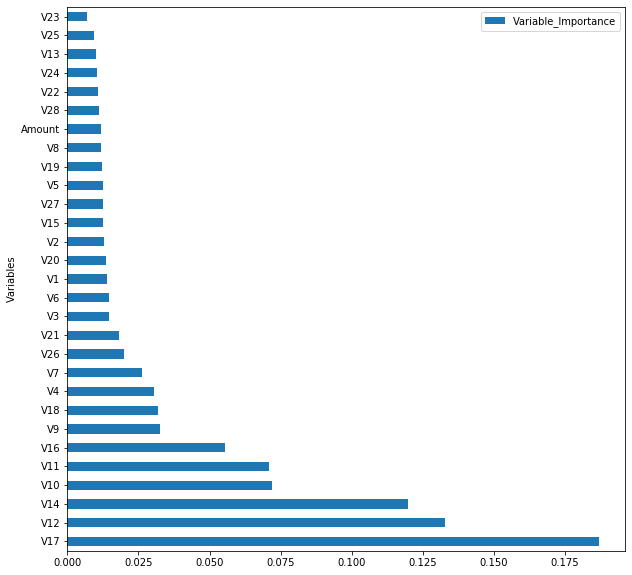

In [22]:
ax = feature_importance.plot.barh(x='Variables', y='Variable_Importance', figsize = (10,10))